<h1><center>HR-Snow & Ice products monitoring - Demo </center></h1>
<h2><center> Satellite data for monitoring ice cover lakes in Poland </center></h2>

This notebook presents a use case of the Copernicus Pan European HR-S&I products: **identify ice occurences on lakes**. 

*The target products related to this Notebook is:*
- Aggregated River and Lake Ice Extent (ARLIE)

ARLIE is computed for all EU-Hydro river basins and is a spatial aggregation of River and Lake Ice Extent (RLIE) products providing the percentage of class cover (open water,snow-free/snow-covered ice) over individual lakes and within 10 km longitudinal sections of rivers. Find more details in the<a href="https://land.copernicus.eu/en/technical-library/hrsi-ice-pum/@@download/file" target="_blank"> Product User Manual (PUM)</a>.

**ARLIE product is hosted on a database, which is accessible through a specific API** and does not require registration, while other HR-S&I products can be visualised, searched and downloaded through different solutions. 
This API provides 2 procedures (RPC) that can be called in order to get the information needed:
- The first procedure is used to retrieve the aggregated ice information on a specific area and time interval :  https://cryo.land.copernicus.eu/arlie/get_arlie
- The second one is to retrieve the geometries (river sections and lakes): https://cryo.land.copernicus.eu/arlie/get_geometries 

An example of URL request can be found <a href="https://cryo.land.magellium.fr/get_arlie?geometrywkt=POINT(21.719406798130574+53.75452788341801)&cloudcoveragemax=100&startdate=2017-12-01&completiondate=2022-03-30" target="_blank">      here</a>. 

A <a href="https://github.com/eea/clms-hrsi-api-client-python-arlie" target="_blank">Python client</a> has been developed to facilitate the use of the URLs described above and make the retrieval of ARLIE easier. **The present notebook relies on this Python script**.

Contact point: <a href="https://land.copernicus.eu/contact-form" target="_blank">Copernicus Land Monitoring Service (CLMS) desk</a>. \
*Contributors: <a href="https://earthobservation.magellium.com/?lang=en">Magellium</a>.*
**********

### Perequisities
- Download the <a href="https://github.com/eea/clms-hrsi-api-client-python-arlie" target="_blank">Python client</a> and store it in the same folder as this Jupyter notebook.

### Load modules 

The main python packages that are mandatory for this Notebook are:
- *pandas:* library for array data manipulation and use of ARLIE products
- *matplotlib.pyplot:* library for visualisation and plotting

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

### Define your Area of Interest (AOI)

Here we define our Area of Interest (AOI). Within this AOI, the ARLIE statistics will be given over individual lakes and within 10 km longitudinal sections of rivers. \
<a href="https://github.com/eea/clms-hrsi-api-client-python-arlie" target="_blank">The Python script</a> manages AOIs defined in WKT (Well-Known Text) format. This can be obtained using an online website such as <a href="https://wktmap.com/?6684b3ed" target="_blank">WKT map</a>. There you can draw our polygon by using the "Draw a polygon" tool which is on the right on the map (cf screenshot).

<figure><img src='images/finder_geometry.png' alt='Polygon selection on the Finder' align='center' width='100%'>
</figure>
</div> 

Once you drew your polygon, you can copy the WKT related to it in the lower left box ("Share" green button). It will be the AOI that we will use for the rest of this example.

NB: the EPSG that we need to use is the default one proposed on the website (EPSG 4326 - WGS84).


### Download ice statistics (ARLIE) on lakes and river sections in your AOI

<a href="https://github.com/eea/clms-hrsi-api-client-python-arlie" target="_blank">The Python script</a> only requires the basic Python libraries and can be run easily on every environement.

The first step is to execute the request on the desired AOI, for a specific period. Some arguments are needed to execute the request such as:
- *outputDir*: to indicate where the ARLIE will be stored
- *geometryWKT*: the definition of the AOI in WKT format (obtained previously on the website WKT map)
- *startDate/completionDate*: to specify the period of the request
- *cloudCoverageMax*: to indicate the maximum cloud coverage 
- *requestGeometries*: to indicate if the geometries linked to the ARLIE must be retrieved
- *returnMode*: to indicate if the products must be stored on a CSV file and/or in a Python variable

The function to call for making the request is *download_arlie_products*.

In [1]:
from clms_hrsi_arlie_downloader import download_arlie_products

# below are the different arguments of the download_arlie_products function.
myAOI='POLYGON ((21.192627 53.884916, 22.148438 53.904338, 22.368164 53.612062, 21.313477 53.599025, 21.192627 53.884916))'
geometryWkt = myAOI

outputDir = "./output_folder"
startDate = '2017-12-01'
completionDate = '2022-03-30'
cloudCoverageMax = 100
requestGeometries = True #if False, it will only return the ARLIE statistics.
returnMode = 'csv_and_variable' #three options: "csv", "csv_and_variable", "variable"

# I do retrieve both the geometries and the ARLIE statistics
geom, arlie = download_arlie_products(returnMode, outputDir=outputDir, startDate=startDate, completionDate=completionDate, geometryWkt=geometryWkt, cloudCoverageMax=cloudCoverageMax, requestGeometries=requestGeometries)

Creating directory /home/jovyan/JupyterNB/DemoARLIE/output_folder
Getting number of geometries
Executing request for geometries: https://cryo.land.copernicus.eu/arlie/get_geometries?geometrywkt=POLYGON+((21.192627+53.884916%2C+22.148438+53.904338%2C+22.368164+53.612062%2C+21.313477+53.599025%2C+21.192627+53.884916))
Writing geometries in /home/jovyan/JupyterNB/DemoARLIE/output_folder/geometries.csv
Executing request for ARLIE: https://cryo.land.copernicus.eu/arlie/get_arlie?geometrywkt=POLYGON+((21.192627+53.884916%2C+22.148438+53.904338%2C+22.368164+53.612062%2C+21.313477+53.599025%2C+21.192627+53.884916))&cloudcoveragemax=100&startdate=2017-12-01&completiondate=2022-03-30
Writing ARLIE in /home/jovyan/JupyterNB/DemoARLIE/output_folder/arlie.csv
Found 208342 ARLIE products.
Writing metadata link into /home/jovyan/JupyterNB/DemoARLIE/output_folder/ARLIE_MTD.xml
End.


After executing the function, two CSV files were downloaded: **arlie.csv** and **geometries.csv** in the folder specified. The first file contains the ARLIE statistics/products while the second contains the geometries that reference the products.

### Manipulate the statistics and geometries CSV files with Python

Once the ARLIE products are downloaded, they can be manipulated and visualised by using the *pandas* library. Here we present how to display the ARLIE sorted by time by using the *pandas* function *sort_values*.
The ARLIE products contain several information for each geometry (river section or lake) inside the AOI:
- water_perc: the percent of water within the geometry
- ice_perc: the percent of ice within the geometry
- other_perc: the percent coverage of other feature class within the geometry
- cloud_perc: percent coverage of cloud and cloud shadow within the geometry
- nd_perc: percent coverage of no data pixels within the geometry
- qc: average value of the RLIE_confidence_level
- source: indicates if the product is derived from S1 (=1) or S2 (=2) or both S1 and S2 (=0) observations

In [5]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')

# read ice statistics
arlie = pd.read_csv(os.path.join(outputDir, 'arlie.csv'), parse_dates=['datetime'], date_parser=dateparse, delimiter=";")
arlie = arlie.sort_values(by="datetime", ascending=True)
display(arlie)

,id,river_km_id,datetime,water_perc,ice_perc,other_perc,cloud_perc,nd_perc,qc,source
0,1,342225,2017-12-01 16:27:05,83,14,0,0,3,2,Sentinel-1 Sentinel-2
62,63,342433,2017-12-01 16:27:05,83,10,0,0,7,2,Sentinel-1 Sentinel-2
61,62,342430,2017-12-01 16:27:05,89,6,0,0,5,2,Sentinel-1 Sentinel-2
60,61,342419,2017-12-01 16:27:05,78,16,0,0,6,2,Sentinel-1 Sentinel-2
59,60,342410,2017-12-01 16:27:05,75,10,0,0,15,2,Sentinel-1 Sentinel-2
...,...,...,...,...,...,...,...,...,...,...
188037,188038,339919,2022-03-28 16:28:32,0,0,86,0,14,0,Sentinel-1 Sentinel-2
188038,188039,339923,2022-03-28 16:28:32,82,0,3,0,15,0,Sentinel-1 Sentinel-2
188039,188040,339930,2022-03-28 16:28:32,90,0,4,0,6,0,Sentinel-1 Sentinel-2
188041,188042,339961,2022-03-28 16:28:32,36,0,51,0,13,0,Sentinel-1 Sentinel-2


After that, we select the biggest lakes on the specified AOI by using the *area* information provided in the geometries file.

In [6]:
# read the geometries 
geometries = pd.read_csv(os.path.join(outputDir, 'geometries.csv'), delimiter=";")

# identify the two largest lakes of the region
biggest_lakes = geometries.nlargest(2, "area")
biggest_lakes_id = biggest_lakes.id.values
display(biggest_lakes)

,id,geometry,basin_name,eu_hydro_id,object_nam,area,river_km
94,343099,"MULTIPOLYGON(((5093833.4295 3462455.9311,50935...",Vistula,IW37005303,Jezioro Sniardwy,99346677.1,0
165,343075,"MULTIPOLYGON(((5101731.0249 3462283.4637,51017...",Vistula,IW37005279,Jezioro Ros,16635878.7,0


In this last step, we plot the ice cover change over the study period 2017-2022 above these two largest lakes in the region. To do so:
- We first sort the arlie statistics table by river_km_id for optimisation of the computations to come. 
- We review all the lines in the arlie statistics table in order to identify which lines correspond to the selected lakes (correspondance between the "river_km_id" column of the ARLIE table refers to the column "id" of the geometries)
- For each lake, we extract the information, filter to only keep information with the highest confidence level ("qc") and eventually save the ice cover statistics. 
- We finally rely on the Matplotlib librairy to plot the ice cover statistics above both lakes on a single figure. 

Hydro element Jezioro Ros, id: 343075 

Hydro element Jezioro Sniardwy, id: 343099 



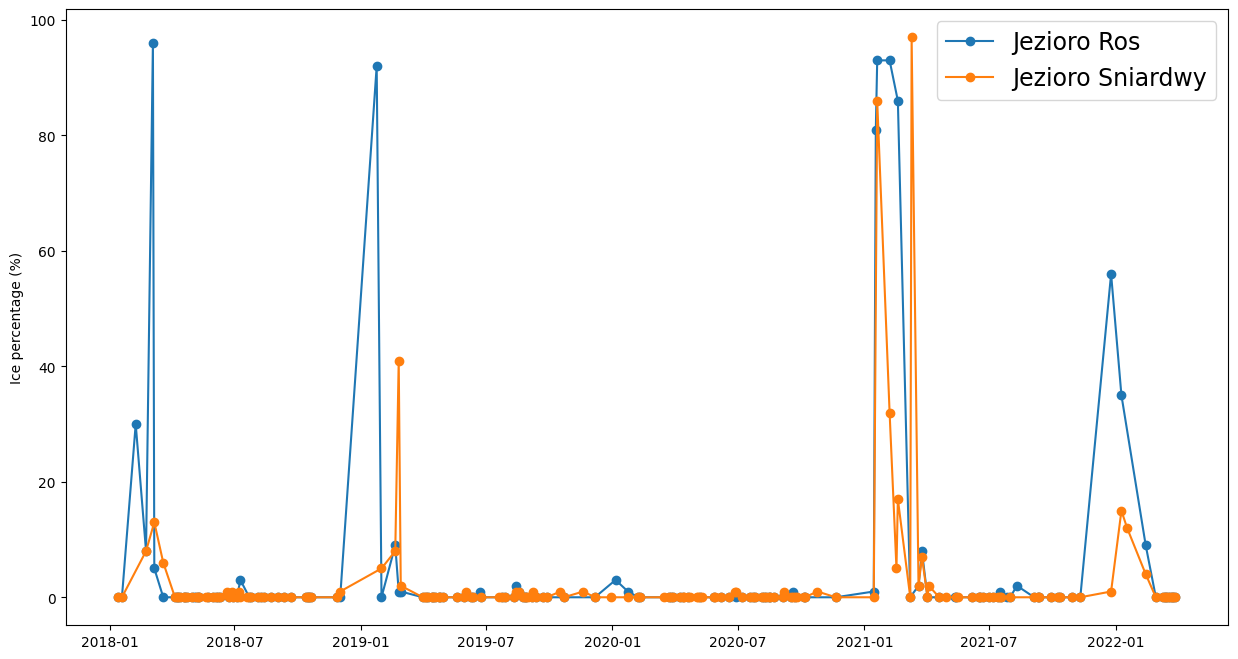

In [7]:
# Retrieve ARLIE statistics on those two lakes

fig, ax=plt.subplots(1, 1, figsize=(15, 8))
plt.rcParams.update({'font.size':15}); plt.rcParams.update({'legend.fontsize':17})

# Group ARLIE stats by river_id (= section ID)
sorted_arlie = arlie.groupby('river_km_id')

for section_id, frame in sorted_arlie:
    
    # Find ARLIE stats on the lakes I am looking for
    if section_id in biggest_lakes_id:

        # Get the name and ID of the lakesa I am looking for
        geom_name = geometries.where(geometries.id == section_id).dropna().object_nam.values[0]
        print("Hydro element %s, id: %d \n"%(geom_name, section_id))
        
        # Only get ARLIE stats with high confidence (i.e. QC flag = 0)
        frame = frame.where(frame.qc == 0).dropna()
        
        #  Plot the ice data over the time period I requested
        plt.plot_date(frame.datetime.values, frame.ice_perc.values, ls='-', label=geom_name)

ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
plt.ylabel('Ice percentage (%)')
plt.legend();


### Similar manipulations with QGIS

Two CSV files were downloaded: **arlie.csv** and **geometries.csv**. Both can be open in QGIS following the procedure described in ARLIE- Technical note available on the <a href="https://land.copernicus.eu/en/technical-library?b_size=10&query=%5B%7B%22i%22%3A%22portal_type%22%2C%22o%22%3A%22paqo.selection.any%22%2C%22v%22%3A%5B%22TechnicalLibrary%22%5D%7D%2C%7B%22i%22%3A%22SearchableText%22%2C%22o%22%3A%22paqo.string.contains%22%2C%22v%22%3A%22%5C%22Technical%20note%20on%20data%20access%20-%20pan-European%20High%20Resolution%20Aggregated%20River%20and%20Lake%20Ice%20Extent%5C%22%22%7D%5D&sort_order=ascending" target="_blank"> CLMS portal</a>. 

Once the CSV files have been opened in QGIS, we can visualise the geometries as follow:

<div style='text-align:center;'>
<figure><img src='images/QGIS_geometries_and_arlie_table.png' alt='Display the river sections and lakes geometries and the ARLIE table in QGIS' align='center' width='100%'>
</figure>
</div>

Then, it is possible to request the largest lakes in the AOI (same use case than made with the Python script above). To do this, we open the Database Manager found at "select Database > DB Manager > DB Manager" and get the SQL window as follows:

<div style='text-align:center;'>
<figure><img src='images/QGIS_database_manager.png' alt='make SQL requests in QGIS' align='center' width='90%'>
</figure>
</div>

And we can now execute SQL commands to manipulate the ARLIE products. To retrieve the biggest lakes of the AOI we can execute the following SQL command:

<code>SELECT id, object_nam, area from geometries ORDER BY area DESC</code>

When we press the "Execute" button we get the results of the command that appear at the bottom of the window.

<div style='text-align:center;'>
<figure><img src='images/QGIS_geometries.png' alt='largest geometries in QGIS' align='center' width='70%'>
</figure>
</div>

Then we can extract the ice percentage relative to the Sniardwy Lake with the following SQL command:

<code>select datetime, ice_perc from arlie
join geometries on arlie.river_km_id = geometries.id
where arlie.river_km_id = 343099</code>

We can store the results of the command (i.e. the ice percentage) in a specific layer. To do that, we need to check the "load as new layer" icon, set the name of the layer to be saved and click the "Load now!" button.

<div style='text-align:center;'>
<figure><img src='images/QGIS_sniardwy_ice_perc.png' alt='sniardwy_ice_perc_QGIS' align='center' width='80%'>
</figure>
</div>

Once this new layer is saved, it can be manipulated in QGIS and further used in Python, Excel, or manipulated in other Geographic Information System (GIS) softwares. 




### Going further and focus on January 2021 episode in this area

The River and Lake Ice Extent (RLIE) product, used as basis for the ARLIE database, can be visualised, search and donwloaded through <a href="https://wekeo.eu/data/" target="_blank">WEkEO</a>, or searched and downloaded through the HR-S&I <a href="https://cryo.land.copernicus.eu/finder/" target="_blank">Cryo finder</a>.
<div style='text-align:center;'>
<figure><img src='images/WEKEO_rlie_product_20210119.png' alt='rlie_product_wekeo_20210119' align='center' width='90%'>
</figure>
</div> 
Above, the visualisation of the RLIE product on 19 January 2021 on the WEkEO interface.